## Assignment is below at the bottom

Video 13.1
https://www.youtube.com/watch?v=kIGHE7Cfe1s

Video 13.2
https://www.youtube.com/watch?v=Rm9bJcDd1KU

Video 13.3
https://youtu.be/6HjZk-3LsjE

In [1]:
import numpy as np
import tensorflow as tf

In [10]:
from keras.callbacks import TensorBoard
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

xtrain = xtrain.astype('float32') / 255.
xtest = xtest.astype('float32') / 255.
xtrain = xtrain.reshape((len(xtrain), np.prod(xtrain.shape[1:])))
xtest = xtest.reshape((len(xtest), np.prod(xtest.shape[1:])))
xtrain.shape, xtest.shape

((60000, 784), (10000, 784))

In [11]:

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
x = input_img = Input(shape=(784,))

# "encoded" is the encoded representation of the input
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
encoded = Dense(encoding_dim, activation='relu')(x)

# "decoded" is the lossy reconstruction of the input
x = Dense(128, activation='relu')(encoded)
x = Dense(256, activation='relu')(x)
decoded = Dense(784, activation='sigmoid')(x)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

encoder = Model(input_img, encoded)

# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
dcd1 = autoencoder.layers[-1]
dcd2 = autoencoder.layers[-2]
dcd3 = autoencoder.layers[-3]

# create the decoder model
decoder = Model(encoded_input, dcd1(dcd2(dcd3(encoded_input))))

In [12]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [ ]:
autoencoder.fit(xtrain, xtrain,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(xtest, xtest))

In [ ]:
encoded_imgs = encoder.predict(xtest)
decoded_imgs = decoder.predict(encoded_imgs)
import matplotlib.pyplot as plt

n = 20  # how many digits we will display
plt.figure(figsize=(40, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(xtest[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
noise = np.random.normal(20,4, (4,32))
noise_preds = decoder.predict(noise)

In [ ]:
plt.imshow(noise_preds[1].reshape(28,28))

In [ ]:
np.max(encoded_imgs)

In [ ]:
encoded_imgs

In [ ]:
%matplotlib inline

In [ ]:
plt.scatter(encoded_imgs[:,1], encoded_imgs[:,0], s=1, c=ytest, cmap='rainbow')
# plt.show()

In [ ]:
plt.scatter(encoded_imgs[:,1], encoded_imgs[:,3], s=1, c=ytest, cmap='rainbow')
# plt.show()

In [ ]:
plt.scatter(encoded_imgs[:,1], encoded_imgs[:,2], s=1, c=ytest, cmap='rainbow')
# plt.show()

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(encoded_imgs[:,1], encoded_imgs[:,2], encoded_imgs[:,3], c=ytest, cmap='rainbow', s=1)

# Assignment


1. change the `encoding_dim` through various values (`range(2,18,2)` and store or keep track of the best loss you can get. Plot the 8 pairs of dimensions vs loss on a scatter plot


In [ ]:
losses = []
encoding_dim = (range(2, 18, 2))

encoded_imgs = encoder.predict(xtest)
decoded_imgs = decoder.predict(encoded_imgs)

for encoding_dim in encoding_dim:

    x = input_img = Input(shape=(784,))

    x = Dense(256, activation='relu')(x)
    x = Dense(128, activation='relu')(x)
    encoded = Dense(encoding_dim, activation='relu')(x)

    x = Dense(128, activation='relu')(encoded)
    x = Dense(256, activation='relu')(x)
    decoded = Dense(784, activation='sigmoid')(x)

    autoencoder = Model(input_img, decoded)
    encoder = Model(input_img, encoded)

    encoded_input = Input(shape=(encoding_dim,))

    dcd1 = autoencoder.layers[-1]
    dcd2 = autoencoder.layers[-2]
    dcd3 = autoencoder.layers[-3]

    decoder = Model(encoded_input, dcd1(dcd2(dcd3(encoded_input))))
    
    autoencoder.compile(optimizer=tf.keras.optimizers.Adadelta(learning_rate=1), loss='binary_crossentropy')
    
    model = autoencoder.fit(xtrain, xtrain,
                epochs=100,
                batch_size=256,
                shuffle=True,
                verbose=0,
                validation_data=(xtest, xtest))
    


    n = 20  
    plt.figure(figsize=(60, 4))
    for i in range(n):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(xtest[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(decoded_imgs[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()
    
    loss = np.min(model.history["loss"])
    losses.append(loss)
    

In [ ]:
encoding_dim = np.asarray(range(2, 18, 2))
losses = np.asarray(losses)

In [ ]:
encoding_dim.shape, losses.shape

In [ ]:
encoded_imgs

In [ ]:
plt.scatter(encoding_dim, losses, s=100, c = "purple")
plt.title("Dimensions by Loss")
plt.xlabel("Dimensions")
plt.ylabel("Best Loss")
plt.show()

2. **_After_** training an autoencoder with `encoding_dim=8`, apply noise (like the previous assignment) to *_only_* the input of the trained autoencoder (not the output). The output images should be without noise. 

In [ ]:
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

xtrain = xtrain.astype('float32') / 255.
xtest = xtest.astype('float32') / 255.
xtrain = xtrain.reshape((len(xtrain), np.prod(xtrain.shape[1:])))
xtest = xtest.reshape((len(xtest), np.prod(xtest.shape[1:])))
xtrain.shape, xtest.shape

In [ ]:
encoding_dim = 8 

x = input_img = Input(shape=(784,))

x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
encoded = Dense(encoding_dim, activation='relu')(x)

x = Dense(128, activation='relu')(encoded)
x = Dense(256, activation='relu')(x)
decoded = Dense(784, activation='sigmoid')(x)

autoencoder = Model(input_img, decoded)

encoder = Model(input_img, encoded)

encoded_input = Input(shape=(encoding_dim,))

dcd1 = autoencoder.layers[-1]
dcd2 = autoencoder.layers[-2]
dcd3 = autoencoder.layers[-3]

decoder = Model(encoded_input, dcd1(dcd2(dcd3(encoded_input))))

In [ ]:
autoencoder.compile(optimizer=tf.keras.optimizers.Adadelta(learning_rate=1), loss='binary_crossentropy')
autoencoder.fit(xtrain, xtrain,
                epochs=100,
                batch_size=256,
                shuffle=True,
                verbose = 0,
                validation_data=(xtest, xtest))

In [ ]:
encoded_imgs = encoder.predict(xtest)
decoded_imgs = decoder.predict(encoded_imgs)
import matplotlib.pyplot as plt

n = 20  # how many digits we will display
plt.figure(figsize=(40, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(xtest[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
print(np.min(encoded_imgs))
print(np.max(encoded_imgs))

In [ ]:
noise = np.random.normal(20,5, (10000,784))
noise_preds = autoencoder.predict(noise)

In [ ]:
noise_preds.shape

Print a few noisy images along with the output images to show they don't have noise.

In [ ]:
plt.imshow(noise_preds[0].reshape(28,28))

In [ ]:
decoded_imgs.shape

In [ ]:
plt.imshow(decoded_imgs[0].reshape(28,28))

In [ ]:
plt.imshow(noise_preds[1].reshape(28, 28))

In [ ]:
plt.imshow(decoded_imgs[1].reshape(28,28))

In [ ]:
plt.imshow(noise_preds[2].reshape(28, 28))

In [ ]:
plt.imshow(decoded_imgs[2].reshape(28,28))

2022-04-20 19:33:05.093858: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-20 19:33:05.521201: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


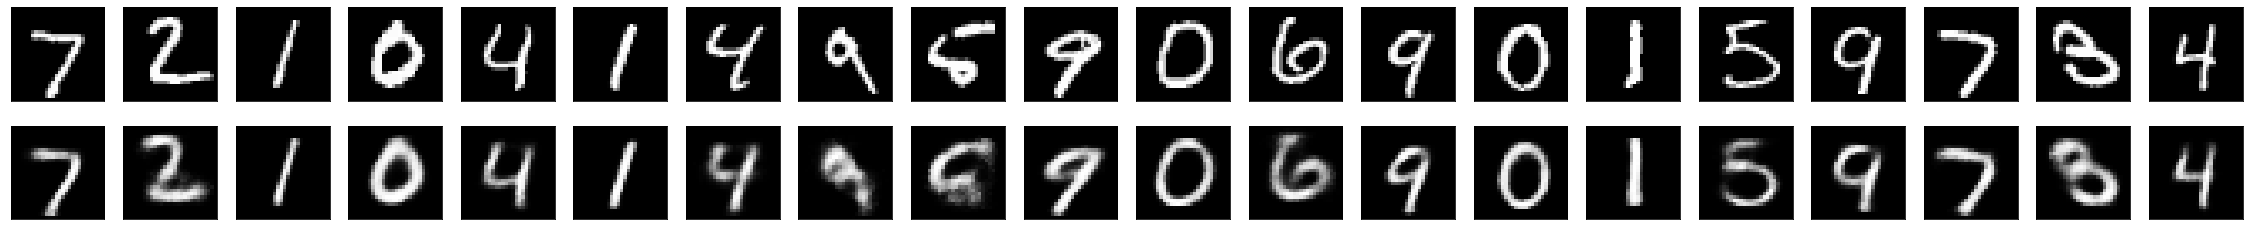

In [35]:
encoded_imgs = encoder.predict(xtest)
decoded_imgs = decoder.predict(encoded_imgs)
import matplotlib.pyplot as plt

n = 20  # how many digits we will display
plt.figure(figsize=(40, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(xtest[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [80]:
print(np.min(encoded_imgs))
print(np.max(encoded_imgs))

0.0
42.548054


In [134]:
noise = np.random.normal(20,5, (10000,784))
noise_preds = autoencoder.predict(noise)

In [135]:
noise_preds.shape

(10000, 784)

Print a few noisy images along with the output images to show they don't have noise.

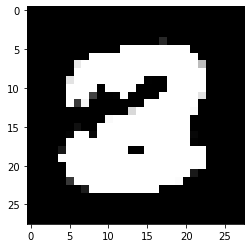

In [136]:
plt.imshow(noise_preds[0].reshape(28,28))

In [137]:
decoded_imgs.shape

(10000, 784)

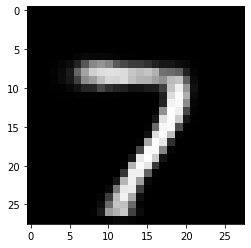

In [138]:
plt.imshow(decoded_imgs[0].reshape(28,28))

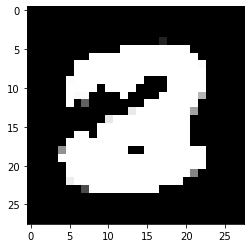

In [55]:
plt.imshow(noise_preds[1].reshape(28, 28))

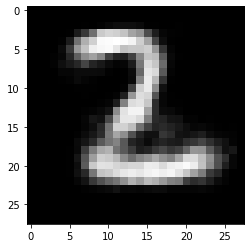

In [131]:
plt.imshow(decoded_imgs[1].reshape(28,28))

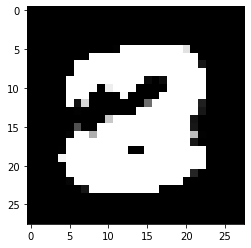

In [59]:
plt.imshow(noise_preds[2].reshape(28, 28))

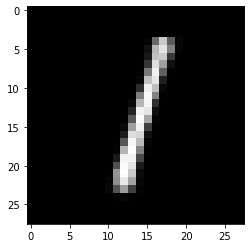

In [132]:
plt.imshow(decoded_imgs[2].reshape(28,28))